In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('studentInfo.csv')

In [3]:
# Tampilkan beberapa baris pertama dataset
df.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
# Tampilkan beberapa baris pertama dataset
df.tail(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [5]:
# Menampilkan detail tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [6]:
# Menampilkan statistik deskriptif
df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [7]:
# Periksa apakah ada missing value
print(df.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [8]:
df['imd_band'].fillna(0, inplace=True)

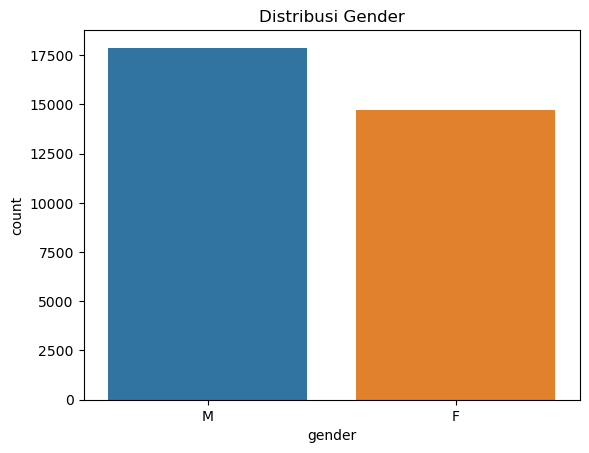

In [9]:
# Melakukan plotting gender 
sns.countplot(x='gender', data=df)
plt.title('Distribusi Gender')
plt.show()

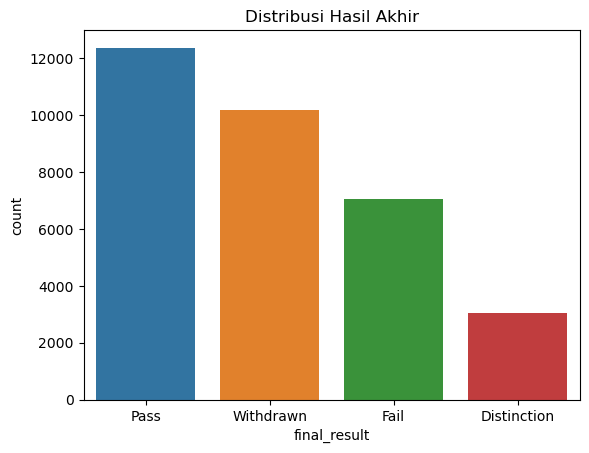

In [10]:
# Melakukan plotting fitur final_result menggunakan histogram
sns.countplot(x='final_result', data=df)
plt.title('Distribusi Hasil Akhir')
plt.show()

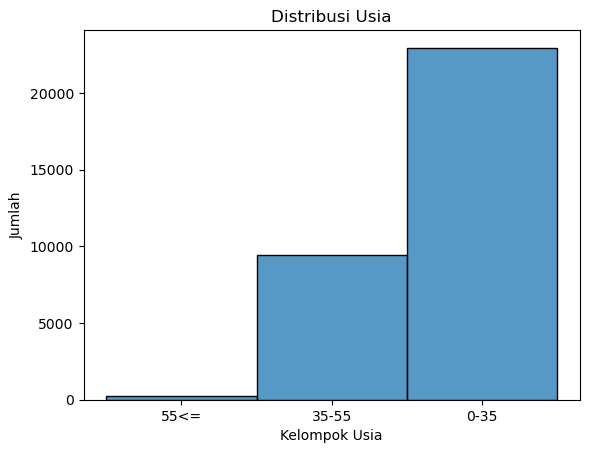

In [11]:
# Melakukan plotting fitur age_band menggunakan histogram
sns.histplot(df['age_band'], bins=5)
plt.title('Distribusi Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.show()

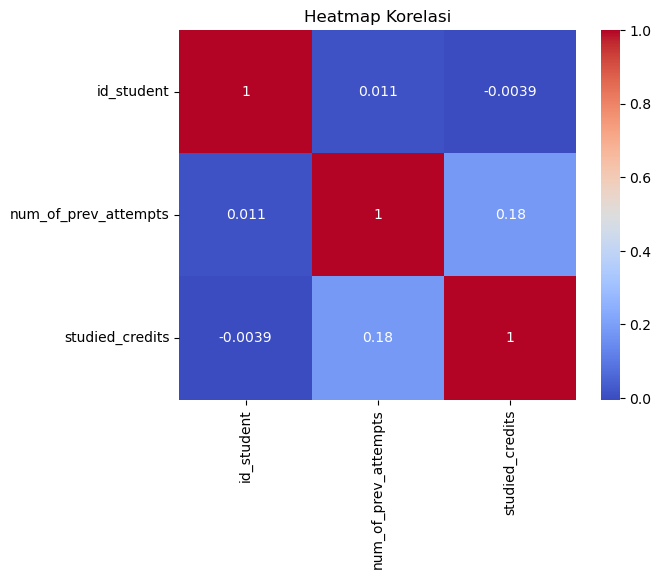

In [12]:
# menampilkan hasil korelasi antar fitur yang ada dalam dataset
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns
matriks_korelasi = df[kolom_numerik].corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


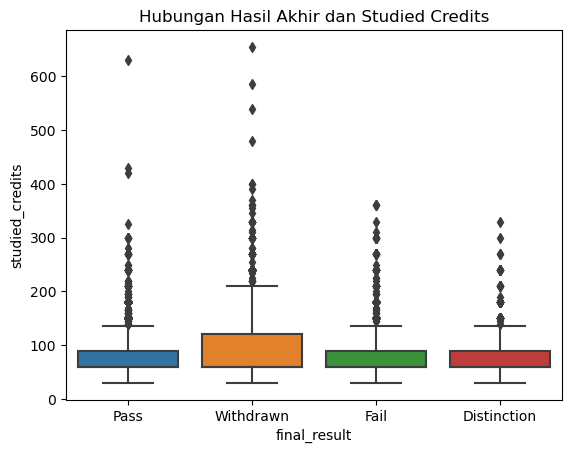

In [13]:
#Melakukan plotting menggunakan box plot
sns.boxplot(x='final_result', y='studied_credits', data=df)
plt.title('Hubungan Hasil Akhir dan Studied Credits')
plt.show()


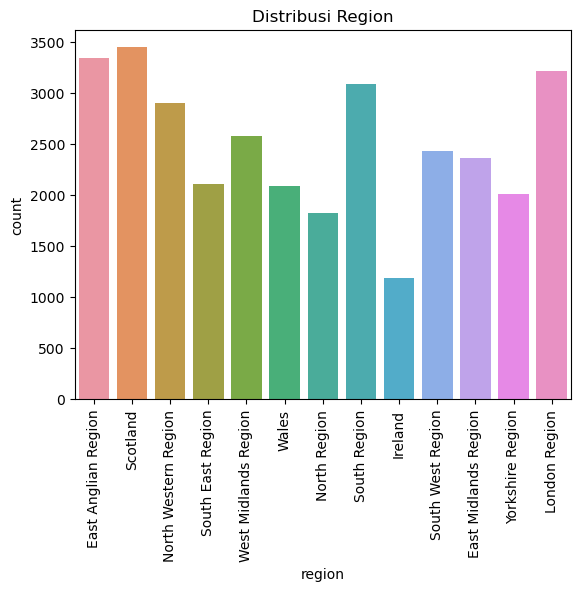

In [14]:
# Melakukan plotting fitur region
sns.countplot(x='region', data=df)
plt.title('Distribusi Region')
plt.xticks(rotation=90)
plt.show()


In [15]:
# Menghitung isi fitur gender
gender_counts = df['gender'].value_counts()
print(gender_counts)


gender
M    17875
F    14718
Name: count, dtype: int64


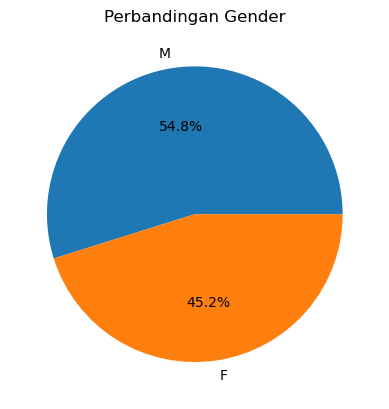

In [16]:
# Melakukan plotting untuk melihat perbandingan gender
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Perbandingan Gender')
plt.show()


In [17]:
# menghitung isi fitur region
region_counts = df['region'].value_counts()
print(region_counts.head())


region
Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
Name: count, dtype: int64


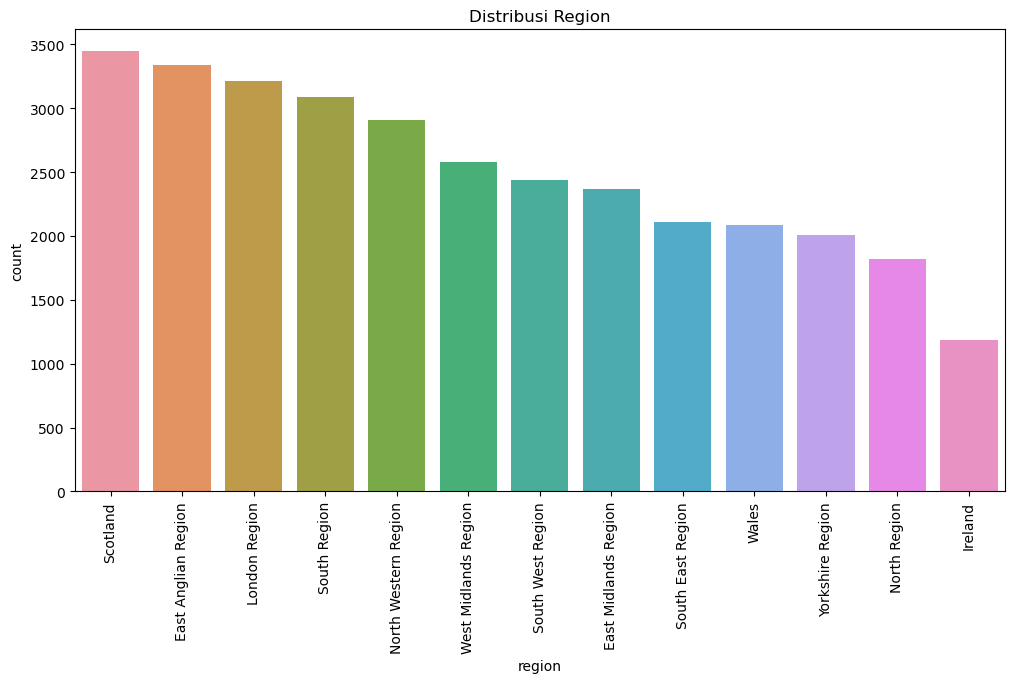

In [18]:
# Melakukan plotting fitur region
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=df, order=df['region'].value_counts().index)
plt.title('Distribusi Region')
plt.xticks(rotation=90)
plt.show()


In [19]:
# menghitung isi fitur highest_education
highest_education_counts = df['highest_education'].value_counts()
print(highest_education_counts)


highest_education
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: count, dtype: int64


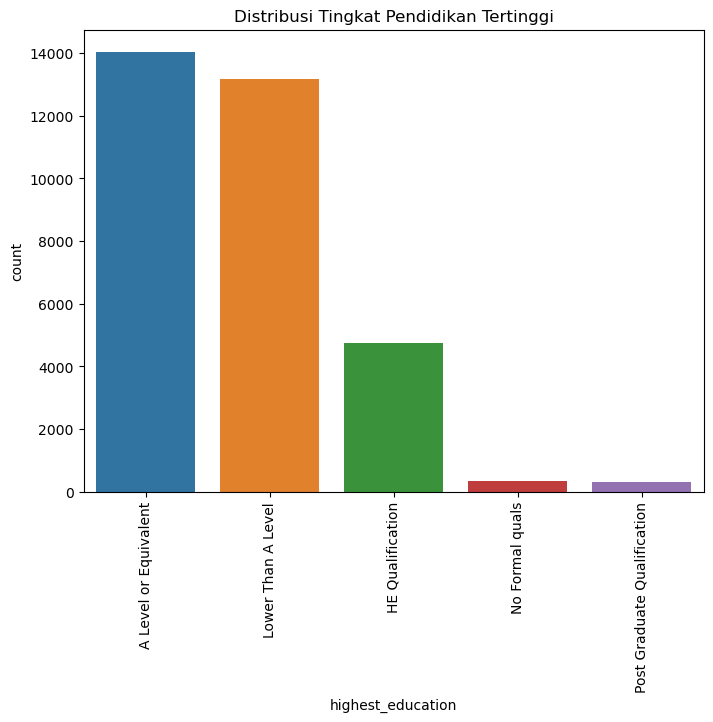

In [20]:
# Melakukan plotting untuk fitur highest_education
plt.figure(figsize=(8, 6))
sns.countplot(x='highest_education', data=df, order=df['highest_education'].value_counts().index)
plt.title('Distribusi Tingkat Pendidikan Tertinggi')
plt.xticks(rotation=90)
plt.show()
